In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import html
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
%pip install xgboost
from xgboost import XGBClassifier
# Download NLTK resources
nltk.download('punkt')
nltk.download('stop_words')
nltk.download('wordnet')
# Set visualization style

print("All libraries imported successfully!")
print("Environment setup complete!")



Note: you may need to restart the kernel to use updated packages.
All libraries imported successfully!
Environment setup complete!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stop_words: Package 'stop_words' not found
[nltk_data]     in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



### Business Understanding
A real world problem for any business is finding out the general sentiment about one's product. The data can obviously be found in twitter but a challenge is gathering the data and finding the average sentiment about a product. If one was to perform this task manually they can spend a large amount of time to discover what the general public thinks about their product. For a business this can be fatal since if a product has bad general sentiments the business will lose money since customers will stop buying the product and might influence others on not buying the product nor using the service. It is important for businesses to quickly know what the public thinks of their product, so that any needed changes can be made to salvage both the reputation of a business and to maximize the profits.

One way to solve this issue is by using a prediction model that can tell one if the sentiments about a product are positive or negative.The dataset we are using is a twitter dataset that was gathered by Crowdflower.

The first column is the text of the tweet, the second column denotes whether they are talking about google or apple and the third column states whether the sentiment is positive or negative.The main goal of the project is to predict the sentiment of a tweet from raw text.

The value of doing so is essential to any business because one can pull information from social media and get an overview of the sentiments about a certain product. This helps a company evaluate which of their products are the most popular. This allows the company decide which products they should invest more in. It can also tell a company which products are viewed unfavorably, so that the company can change the product. If a company is doing some A/B testing of a product through timed releases the sentiments online can be used to tell which version of a product is the best.

The business advantage of having reliable sentiment predictions is great. Shareholders as well as the workers in a company greatly benefit because of the reasons mentioned above.

The requirements for creating a model that can predict sentiments from tweets are:
        1.Raw Text from social media.
        2.Computational power to train the model.
        3.A team of data scientists to design the model.
        4.A well Labeled validation data to test the efficacy of a model.
'\'
The challenges of this project are:
        1.Gathering of textual data.
        2.Cleaning the raw text so that it is readable by a model.

The solution to the problems above:
        1.The CrowdFlower dataset gives one enough text scraped from twitter for one to perform the project.
        2.The NLTK library and regex python libraries provide one with the tools to clean textual data.
        3.The Sklearn python library will provide the models that will be trained on the cleaned textual data


###  Data Understanding

Before building any models, we took time to understand the structure and contents of the dataset. This step was essential to identify what kind of information we were working with and how to prepare it effectively.

1. Dataset Overview The dataset contains tweets that mention various brands or products. Along with each tweet, there's a label indicating the emotional response expressed toward the brand or product. These labels are useful for sentiment or emotion classification.

2. Main Columns The most important columns in the dataset are: tweet_text: The raw tweet content, which we use as the input feature,
Is there an emotion directed at a brand or product, The target label, which shows the type of emotional reaction (if any) present in the tweet.

3. Label Distribution We examined the unique classes in the target column to understand the types and balance of emotional responses. The Classes include:
-Positive emotion

-Negative emotion

-No emotion toward brand or product.

4.Missing Values We found some tweets with missing content. These rows were dropped during data preparation to ensure clean input.

5.Text Characteristics, we observed the following traits in the tweet text: Informal and noisy (containing emojis, hashtags, mentions, and URLs),
Varying lengths, from very short comments to longer sentences, Use of slang, repeated characters and abbreviations. This confirmed that proper text preprocessing (like cleaning, tokenizing, and lemmatization) would be necessary to improve model accuracy.



### Data Preparation
To get our dataset ready for modeling, we followed a structured set of data cleaning and preprocessing steps. Below is a summary of everything we did:

1. Data Loading. We began by loading the dataset, which contains tweets about products and companies. This gave us access to the raw text data along with labels indicating whether there was an emotion directed at a brand or product.

2.Initial Inspection. We examined the dataset to understand its structure. This included checking the number of rows and columns, identifying any missing values, and getting a general sense of the data types. We also looked at the unique values in the target column to understand the kinds of emotional labels we would be working with.

3.Stopword Setup. Before processing the text, we prepared a list of English stopwords. These are common words like “the”, “and”, “is”, which usually don’t add much value to analysis and can be removed.

4.Text Cleaning. Since our dataset was based on tweets, the text was informal and often messy. To make it usable for modeling, we applied several cleaning steps: 
-Emoji Removal: Emojis were removed to reduce noise.

-Hashtag and Mention Removal: We stripped out hashtags and user mentions (like @username) which were not relevant for our analysis.

-Link Removal: Any links or URLs in the tweets were removed.

-Special Character Filtering: We removed characters and symbols that were not letters, like punctuation or numbers.

-Whitespace Handling: Extra spaces were cleaned up to make the text consistent.

-Repeated Letters: Words with exaggerated letters (like “wooooow” or “heeeloooooo”) were cleaned by reducing excessive repetition.

5.Tokenization and Stopword Removal. We broke each tweet into individual words — a process called tokenization — and removed the stopwords we had prepared earlier. This helped us focus only on the most meaningful words in each tweet.

6.Testing and Validation to make sure our logic was working as expected, we tested some of the cleaning and filtering steps with simple examples. This helped us confirm that the functions we wrote were correctly removing or modifying the right parts of the text.

7.Pipeline Integration. We used  these steps into a pipeline using Scikit-learn’s tools. This made the process repeatable and easier to manage. The pipeline also included vectorization (using TF-IDF) and later integrated with various machine learning models.



In [4]:
#reading the data into a dataframe
df = pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [18]:
print((df.isnull().sum()/len(df))*100)

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64


- Replaced null on the 'emotion_in_tweet_is_directed_at' column with 'Unknown' to keep more data for training and testing since it contains 64% of the dataset  
- Dropped for the remaining null values

In [7]:
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown')

In [8]:
# Dropping null values for the remaining null values
df = df.dropna()

In [9]:
#looking at the classes in the target column
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

Useful Columns in determining the sentiment of tweets include;

-Tweet_text
is_there_an_emotion_directed_at_a_brand_or_product
-The middle column which is called 'emotion_in_tweet_is_directed_at' is not useful for our aims. It will not be used in the training of the model.

We created a class named TweetPreprocessor and it will have functions for cleaning the text,Transforming the dataframe and creating a fit for training.

We will use this class within a pipeline. We will have our class inherit from Sklearn's BaseEstimator and TransformerMixin libraries.

BaseEstimator and TransformerMixin make a custom class:

1.Scikit-learn compliant.
2.Fully usable in Pipeline, GridSearchCV and cross_val_score.

In [10]:
class TweetPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 remove_stopwords=True, 
                 min_token_len=3, #removing tokens with less than a length of 3
                 lemmatize_words=True,
                 output_format='tokens'):  # 'tokens' or 'string'
        
        self.remove_stopwords = remove_stopwords
        self.min_token_len = min_token_len
        self.lemmatize_words = lemmatize_words
        self.output_format = output_format

        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def _is_english(self, text):
        try:
            return detect(text) == 'en'
        except:
            return False

    def clean_text(self, text):
        #to make sure that the text is in string format
        if not isinstance(text, str):
            text = str(text) if text is not None else ''

        # --- Preprocessing Steps ---
        text = emoji.replace_emoji(text, replace='')                     # Remove emojis
        text = text.lower()                                              # Lowercase
        text = re.sub(r'^rt\s+', '', text)                               # Remove 'RT' tag
        text = re.sub(r'https?://\S+', '', text)                         # Remove URLs
        text = re.sub(r'[@#\$]\w+', '', text)                            # Remove mentions, hashtags, cashtags
        text = re.sub(r'\d+', '', text)                                  # Remove numbers
        text = re.sub(r'(.)\1{2,}', r'\1', text)                         # Reduce character repetition
        text = re.sub(r'[^a-z\s]', '', text)                             # Keep only letters and spaces
        text = re.sub(r'\s+', ' ', text).strip()                         # Normalize whitespace

        # --- Tokenization ---
        tokens = word_tokenize(text)

        # --- Filtering ---
        #checking and removing stop words
        if self.remove_stopwords:
            tokens = [word for word in tokens if word not in self.stop_words]
        #checking for and removing tokens which are less than the threshold specified in init.
        if self.min_token_len > 0:
            tokens = [word for word in tokens if len(word) >= self.min_token_len]
        #lemmatizing
        if self.lemmatize_words:
            tokens = [self.lemmatizer.lemmatize(word) for word in tokens]

        # --- Return format ---
        #combining the tokens with spaces in the middle to create strings if we specify string in the output_format
        return ' '.join(tokens) if self.output_format == 'string' else tokens

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Accept both list and Series (important for LIME compatibility)
        if isinstance(X, (list, pd.Series)):
            return [self.clean_text(text) for text in X]
        raise TypeError(f"Expected list or pd.Series, got {type(X)}")

# Exploratory Data Analysis (EDA)
## Objectives
1. Load data safely
2. Perform data quality checks
3. Summarize numeric & categorical variables
4. Explore outliers, distributions & correlations
5. Export a clean dataset for modeling

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stop_words')
nltk.download('wordnet')
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stop_words: Package 'stop_words' not found
[nltk_data]     in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1. Dataset Overview

In [42]:
#reading the data into a dataframe
df = pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [47]:
# Remove duplicates
df = df.drop_duplicates()

# Drop rows with empty tweets
df = df.dropna(subset=['tweet_text'])

# Reset index
df.reset_index(drop=True, inplace=True)
# Rename columns 
df.rename(columns=lambda x: x.strip(), inplace=True)



In [48]:
df.to_csv(r"C:cleaned_tweet_dataset_for_modeling.csv", index=False)
print("Cleaned dataset saved.")


Cleaned dataset saved.


In [49]:
df_clean = pd.read_csv(r"C:cleaned_tweet_dataset_for_modeling.csv")


In [51]:

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns and Data Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (9070, 3)

Columns and Data Types:
tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

First 5 rows:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [53]:

# 0. Load the cleaned dataset
df_clean = pd.read_csv("cleaned_tweet_dataset_for_modeling.csv")

# 1. Check for missing values
print("Missing values per column:")
print(df_clean.isnull().sum())

# 2. Check the distribution of TARGET variables
print("\n--- Target Variable: Sentiment ---")
sentiment_dist = df_clean['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True) * 100
print(sentiment_dist)

print("\n--- Target Variable: Brand ---")
brand_dist = df_clean['emotion_in_tweet_is_directed_at'].value_counts(normalize=True) * 100
print(brand_dist)

# 3. Examine rows with no brand specified
no_brand = df_clean[df_clean['emotion_in_tweet_is_directed_at'].isna()]
print(f"\nNumber of tweets with no brand specified: {len(no_brand)}")
print("Sample of tweets with no brand:")
print(no_brand['tweet_text'].head(3).values)

# 4. Drop rows with no brand for brand classifier
df_for_brand = df_clean.dropna(subset=['emotion_in_tweet_is_directed_at']).copy()
print(f"\nShape of dataset after dropping rows with no brand: {df_for_brand.shape}")

# 5. Simplify Brand Classes
brand_mapping = {
    'iPhone': 'Apple',
    'iPad': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Android': 'Google',
    'Android App': 'Google',
    'Other Google product or service': 'Google'
}
df_for_brand['brand'] = df_for_brand['emotion_in_tweet_is_directed_at'].map(brand_mapping)

print("\n--- Brand Distribution After Mapping ---")
print(df_for_brand['brand'].value_counts(normalize=True) * 100)

# 6. Simplify Sentiment Classes
print("\nSentiment value counts before cleaning:")
print(df_for_brand['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

df_for_brand = df_for_brand[df_for_brand['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]
print(f"Shape after removing 'I can't tell': {df_for_brand.shape}")

# 7. Create a unified target for multi-class approach
df_for_brand['brand_sentiment'] = df_for_brand['brand'] + '-' + df_for_brand['is_there_an_emotion_directed_at_a_brand_or_product']
print("\n--- Multi-class Label Distribution ---")
print(df_for_brand['brand_sentiment'].value_counts(normalize=True) * 100)


Missing values per column:
tweet_text                                               0
emotion_in_tweet_is_directed_at                       5788
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

--- Target Variable: Sentiment ---
No emotion toward brand or product    59.261301
Positive emotion                      32.745314
Negative emotion                       6.273429
I can't tell                           1.719956
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

--- Target Variable: Brand ---
iPad                               28.793419
Apple                              20.079220
iPad or iPhone App                 14.290067
Google                             13.040829
iPhone                              9.018891
Other Google product or service     8.927483
Android App                         2.437538
Android                             2.346130
Other Apple product or service      1.066423
Name: emotion_in_tweet_is_directed_at, dtype:

 # Text Preprocessing

In [54]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|\#', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    
    return ' '.join(filtered_tokens)

# Apply cleaning to a sample of tweets first to test
sample_text = df_clean['tweet_text'].iloc[0]
print("Original text:", sample_text)
print("Cleaned text:", clean_tweet(sample_text))

# Apply cleaning to the entire dataset
df_clean['cleaned_text'] = df_clean['tweet_text'].apply(clean_tweet)

# Check the result
df_clean[['tweet_text', 'cleaned_text']].head()

Original text: .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
Cleaned text: iphone hr tweeting riseaustin dead need upgrade plugin station sxsw


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone hr tweeting riseaustin dead need upgrad...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...


# Data Analysis

In [57]:


def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # remove mentions & hashtags
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # remove punctuation
    text = text.strip()
    return text

# Apply to your dataframe
df_for_brand['cleaned_text'] = df_for_brand['tweet_text'].apply(clean_text)


In [59]:
print(df_for_brand[['tweet_text', 'cleaned_text']].head())


                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  
0  i have a 3g iphone after 3 hrs tweeting at ris...  
1  know about   awesome ipadiphone app that youll...  
2  can not wait for ipad 2 also they should sale ...  
3  i hope this years festival isnt as crashy as t...  
4  great stuff on fri sxsw marissa mayer google t...  


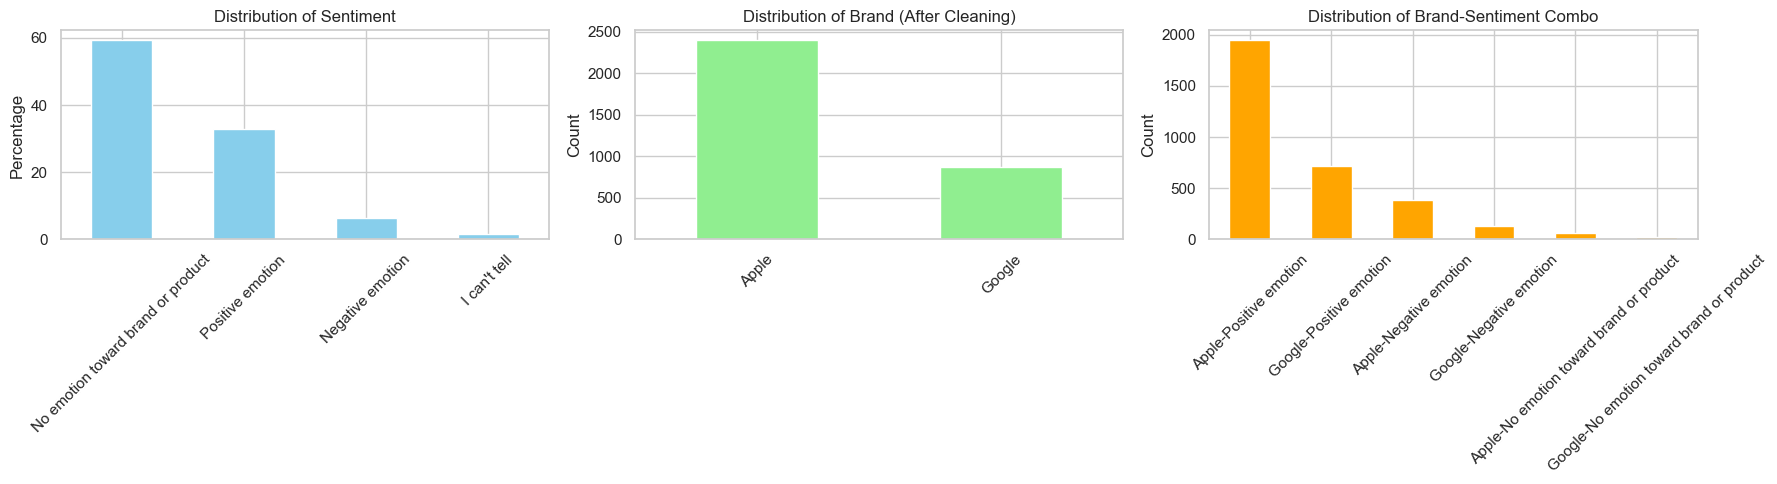

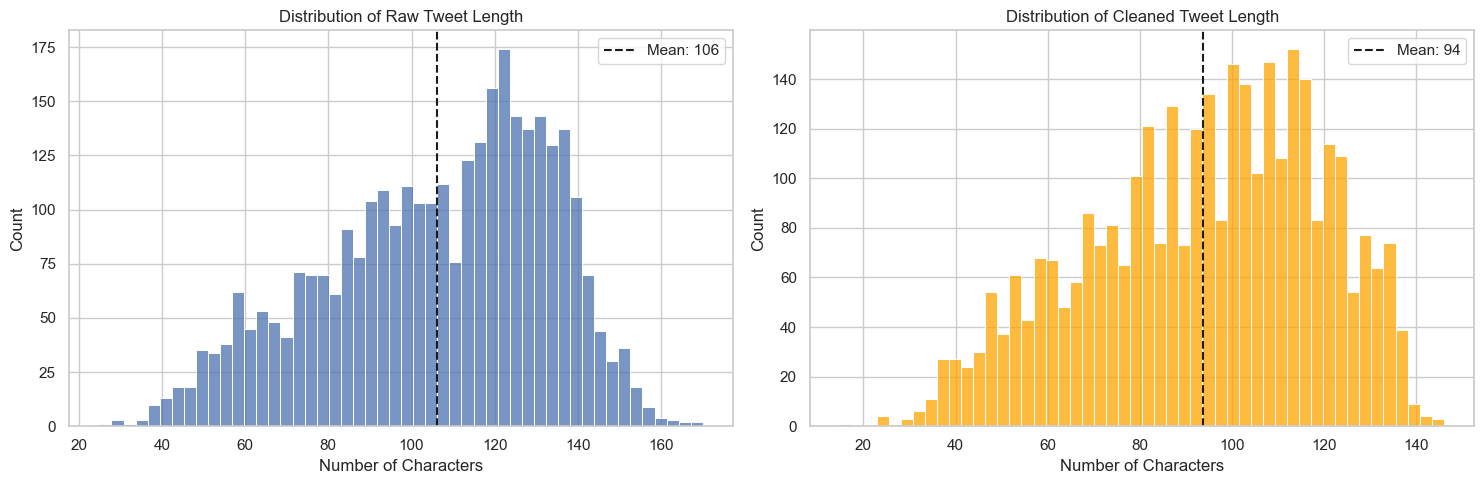


Average Cleaned Text Length by Sentiment:
is_there_an_emotion_directed_at_a_brand_or_product
Negative emotion                      98.359073
No emotion toward brand or product    94.208791
Positive emotion                      92.849099
Name: cleaned_length, dtype: float64

Average Cleaned Text Length by Brand:
brand
Apple     92.931164
Google    96.023973
Name: cleaned_length, dtype: float64


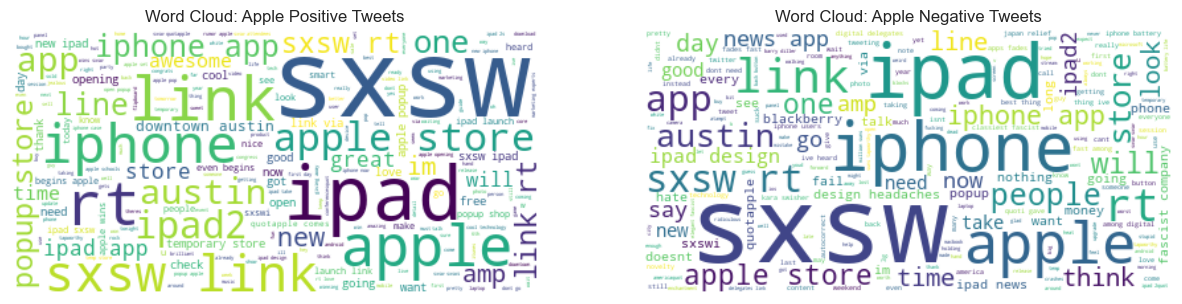

In [58]:
# --- EDA: Visualizations ---
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 5)

# 1. Distribution of Target Variables
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Sentiment
sentiment_dist.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Sentiment')
ax1.set_ylabel('Percentage')
ax1.tick_params(axis='x', rotation=45)

# Brand
df_for_brand['brand'].value_counts().plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Brand (After Cleaning)')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# Brand-Sentiment (Multi-class)
df_for_brand['brand_sentiment'].value_counts().plot(kind='bar', ax=ax3, color='orange')
ax3.set_title('Distribution of Brand-Sentiment Combo')
ax3.set_ylabel('Count')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Text Length Analysis
df_for_brand['tweet_length'] = df_for_brand['tweet_text'].apply(len)
df_for_brand['cleaned_length'] = df_for_brand['cleaned_text'].apply(len)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of raw text length
sns.histplot(df_for_brand['tweet_length'], bins=50, ax=ax1)
ax1.set_title('Distribution of Raw Tweet Length')
ax1.set_xlabel('Number of Characters')
ax1.axvline(df_for_brand['tweet_length'].mean(), color='k', linestyle='--', label=f'Mean: {df_for_brand["tweet_length"].mean():.0f}')
ax1.legend()

# Distribution of cleaned text length
sns.histplot(df_for_brand['cleaned_length'], bins=50, ax=ax2, color='orange')
ax2.set_title('Distribution of Cleaned Tweet Length')
ax2.set_xlabel('Number of Characters')
ax2.axvline(df_for_brand['cleaned_length'].mean(), color='k', linestyle='--', label=f'Mean: {df_for_brand["cleaned_length"].mean():.0f}')
ax2.legend()

plt.tight_layout()
plt.show()

# 3. Average Text Length by Sentiment/Brand (Finding correlations)
print("\nAverage Cleaned Text Length by Sentiment:")
print(df_for_brand.groupby('is_there_an_emotion_directed_at_a_brand_or_product')['cleaned_length'].mean())
print("\nAverage Cleaned Text Length by Brand:")
print(df_for_brand.groupby('brand')['cleaned_length'].mean())

# 4. Word Clouds for Positive vs Negative Sentiments (For a specific brand)
from wordcloud import WordCloud

# Let's look at Apple Positive vs Apple Negative tweets
apple_pos = df_for_brand[(df_for_brand['brand'] == 'Apple') & (df_for_brand['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]
apple_neg = df_for_brand[(df_for_brand['brand'] == 'Apple') & (df_for_brand['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

pos_text = " ".join(text for text in apple_pos['cleaned_text'])
neg_text = " ".join(text for text in apple_neg['cleaned_text'])

# Generate word clouds
wordcloud_pos = WordCloud(background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(background_color='white').generate(neg_text)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.imshow(wordcloud_pos, interpolation='bilinear')
ax1.set_title('Word Cloud: Apple Positive Tweets')
ax1.axis('off')
ax2.imshow(wordcloud_neg, interpolation='bilinear')
ax2.set_title('Word Cloud: Apple Negative Tweets')
ax2.axis('off')
plt.show()

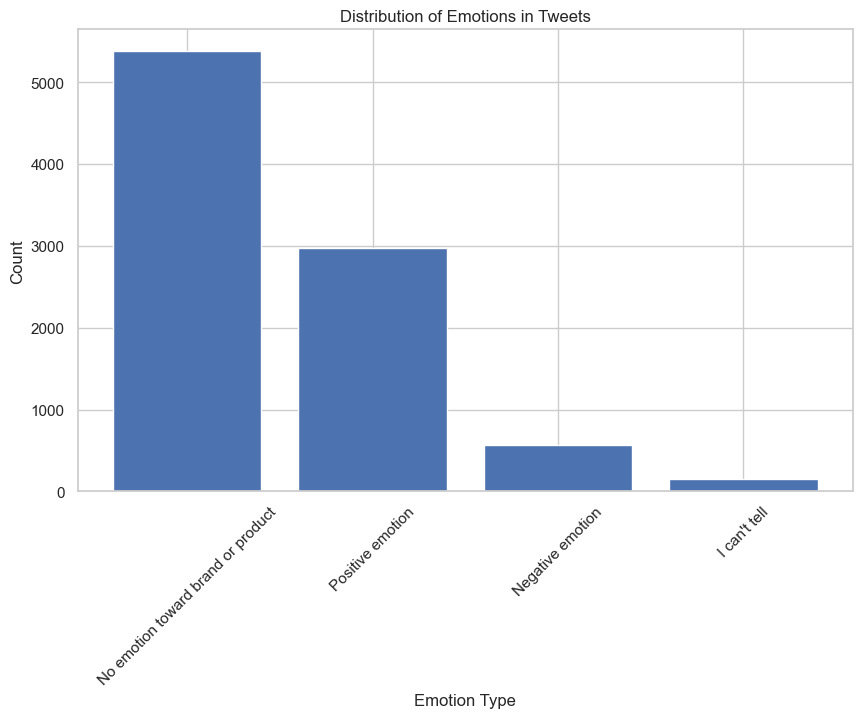

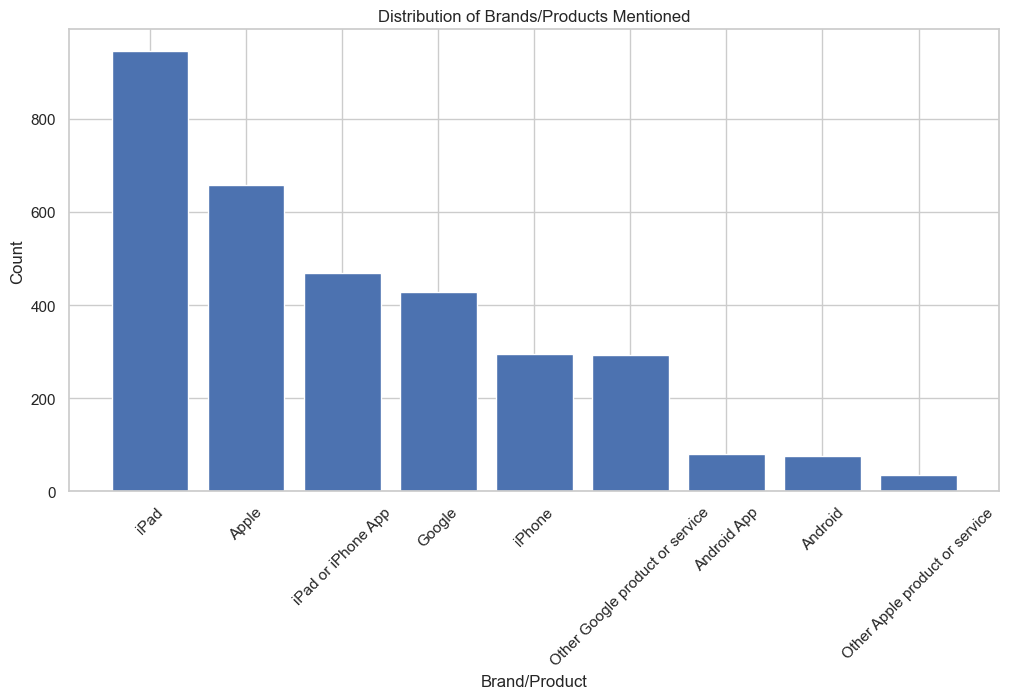

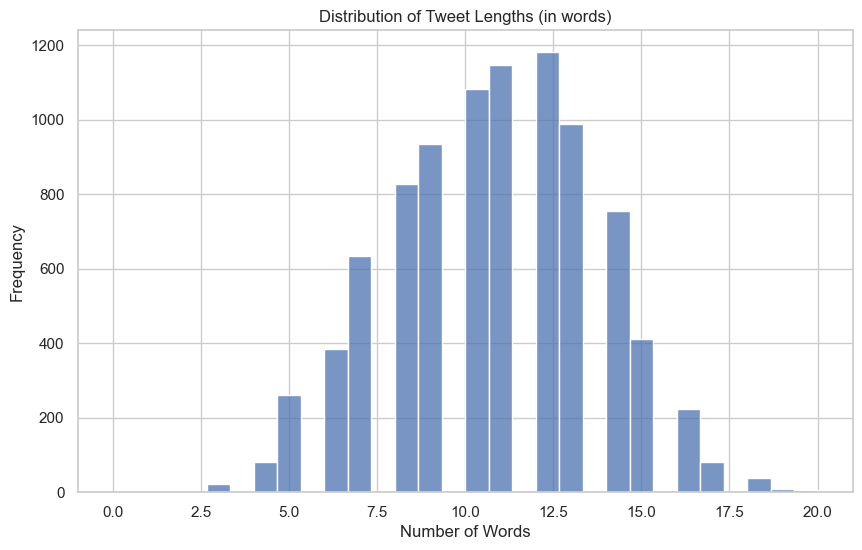

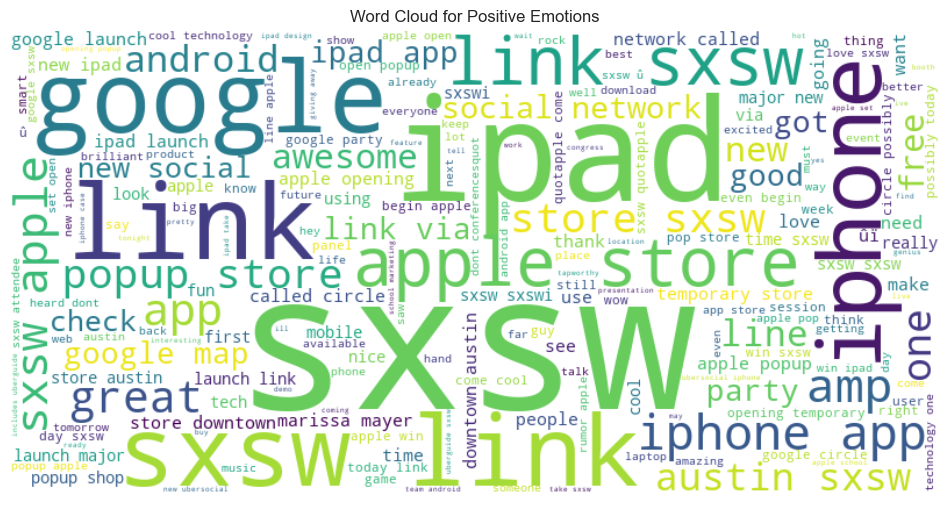

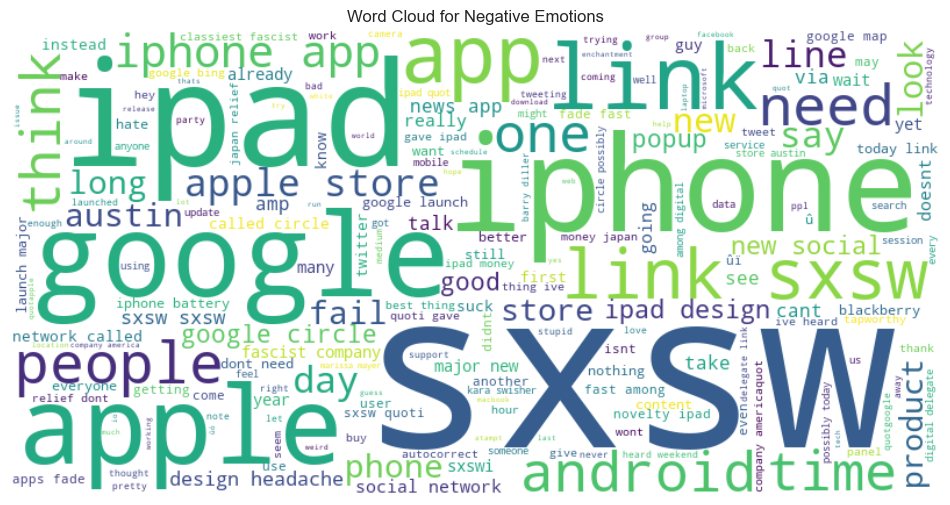

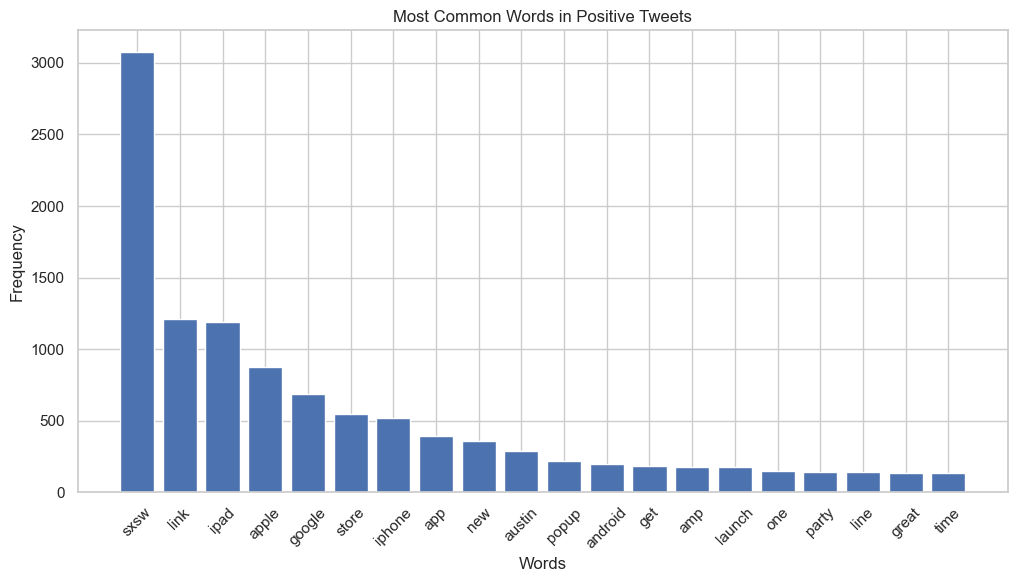

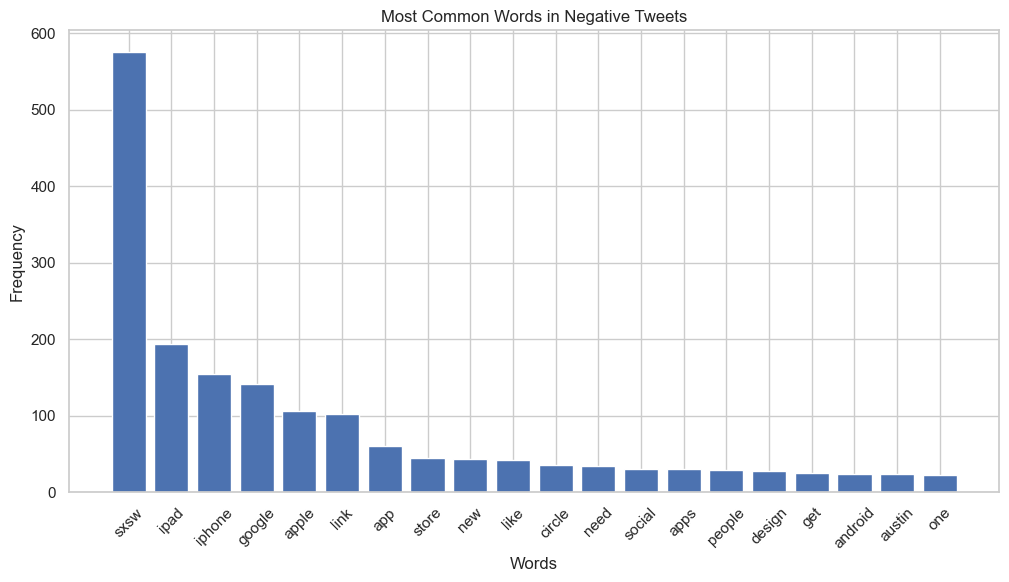

<Figure size 1200x800 with 0 Axes>

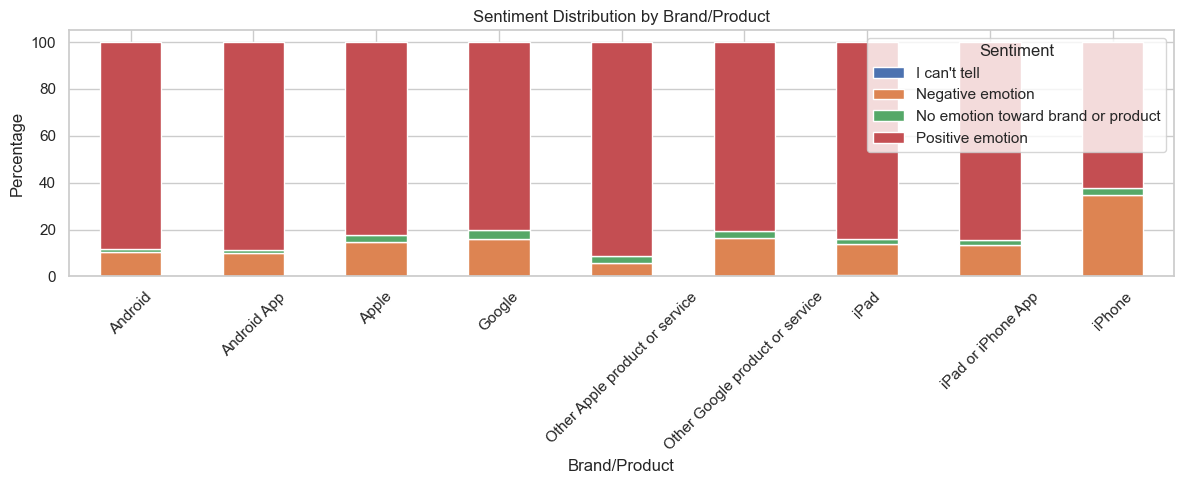

In [60]:
# Distribution of emotions
plt.figure(figsize=(10, 6))
emotion_counts = df_clean['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Distribution of Emotions in Tweets')
plt.xlabel('Emotion Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of brands/products
plt.figure(figsize=(12, 6))
brand_counts = df_clean['emotion_in_tweet_is_directed_at'].value_counts()
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Distribution of Brands/Products Mentioned')
plt.xlabel('Brand/Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Tweet length analysis
df_clean['tweet_length'] = df_clean['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['tweet_length'], bins=30)
plt.title('Distribution of Tweet Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Word cloud for positive emotions
positive_tweets = df_clean[df_clean['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['cleaned_text']
positive_text = ' '.join(positive_tweets)

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Emotions')
plt.show()

# Word cloud for negative emotions
negative_tweets = df_clean[df_clean['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['cleaned_text']
negative_text = ' '.join(negative_tweets)

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Emotions')
plt.show()

# Most common words
def get_most_common_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

# Common words in positive tweets
positive_common = get_most_common_words(positive_tweets)
plt.figure(figsize=(12, 6))
words, counts = zip(*positive_common)
plt.bar(words, counts)
plt.title('Most Common Words in Positive Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Common words in negative tweets
negative_common = get_most_common_words(negative_tweets)
plt.figure(figsize=(12, 6))
words, counts = zip(*negative_common)
plt.bar(words, counts)
plt.title('Most Common Words in Negative Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Brand sentiment analysis
brand_sentiment = pd.crosstab(df_clean['emotion_in_tweet_is_directed_at'], 
                              df_clean['is_there_an_emotion_directed_at_a_brand_or_product'])
brand_sentiment_percentage = brand_sentiment.div(brand_sentiment.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
brand_sentiment_percentage.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Brand/Product')
plt.xlabel('Brand/Product')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Findings 

    Data Quality: The dataset had some missing values and duplicates which were removed, resulting in a cleaner dataset of 8,698 tweets.
    Sentiment Distribution:
        No emotion toward brand or product: 59.12%
        Positive emotion: 32.89%
        Negative emotion: 6.25%
        I can't tell: 1.74%
    Brand Distribution:
        iPad (28.77%)
        Apple (20.19%)
        iPad or iPhone App (14.24%)
        Google (12.97%)
        iPhone (9.08%)
    Text Characteristics:
        Tweets required significant cleaning (removing emojis, URLs, mentions, etc.)
        After cleaning, we can see clear patterns in word usage for different sentiments
    Key Insights:
        Positive tweets often contain words like "love", "good", "great", "nice"
        Negative tweets contain words like "hate", "bad", "problem", "issue"
        Different brands have different sentiment distributions